In [1]:
# %pip install seaborn
# %pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import openpyxl
# read Music Data Legend file
df_legend = pd.read_excel('Music Data Legend.xlsx')
df_legend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           0 non-null      float64
 1   Music Data - Legend  15 non-null     object 
 2   Unnamed: 2           14 non-null     object 
 3   Unnamed: 3           14 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.0+ KB


In [ ]:
# Now read the music_dataset_mod.csv file as a DataFrame
df_music = pd.read_csv('music_dataset_mod.csv')

In [5]:
df_music.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [6]:
# display the names of the columns
df_music.columns

Index(['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
       'String Instrument Detection', 'Electronic Element Presence',
       'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
       'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps',
       'Genre'],
      dtype='object')

# Inspect the Dataset for Missing Values:

In [ ]:
# Use the info() method on the DataFrame to view column names, data types, and non-null counts.
# Look for any columns with missing values and note where they occur.
df_music.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [8]:
# count if there are any missing values in the dataset
df_music.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

# Explore the Target Column (Genre)

In [ ]:
# Use the unique() method on the Genre column to see all distinct genres present in your dataset.
df_music['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

# Visualize Genre Distribution:


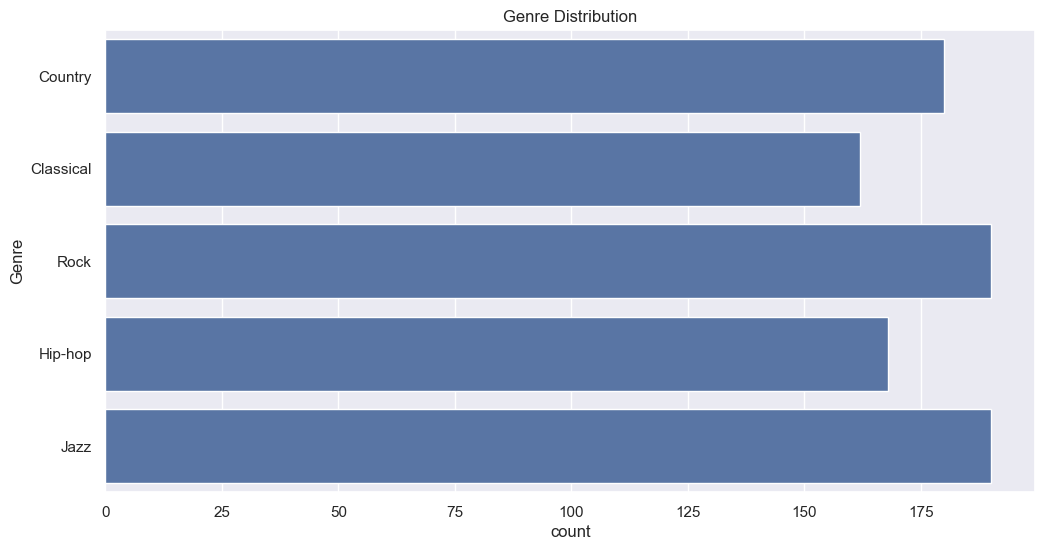

In [ ]:
# Use seaborn's countplot() function to visualize the genre distribution.
# Assess the plot to check if the genres are balanced (bars of similar height) or imbalanced.

plt.figure(figsize=(12, 6))
sns.countplot(df_music['Genre'])
plt.title('Genre Distribution')
plt.show()


# Analyze the Genre Balance:

In [ ]:
# Consider whether an imbalanced genre distribution might impact model training and prediction accuracy.
# Check the number of occurrences for each genre in the dataset.
df_music['Genre'].value_counts()


Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

# Prepare the Data:

In [ ]:
# Create a copy of df_music, ensuring that you do not modify the original data.
# Use the dropna() method to exclude any rows with null values in the Genre column.
# Store the cleaned DataFrame in a new variable, df_music_clean.
df_music_clean = df_music.dropna(subset=['Genre']).copy()

In [13]:
# Split Data into Features and Target:
# Define your feature matrix X by excluding the Genre column from the copied DataFrame.
# Define your target vector y as the Genre column in the DataFrame.
X = df_music_clean.drop(columns='Genre')
y = df_music_clean['Genre']

In [14]:
X.head(2)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146


In [15]:
y.head()

0      Country
1    Classical
2         Rock
3      Hip-hop
4      Country
Name: Genre, dtype: object

# Encode the Target Variable

In [ ]:
# Use LabelEncoder() to transform the categorical genres in y into numeric values.
label_encoder = LabelEncoder()

In [17]:
# Apply fit_transform() on the Genre column to create a new numeric column, Genre_encoded.
# Replace the original Genre column with Genre_encoded in the DataFrame.
y_encoded = label_encoder.fit_transform(y)
y_encoded[:5]

array([1, 0, 4, 2, 1])

# Update the DataFrame:

In [ ]:
# Replace the original Genre column in your DataFrame with Genre_encoded to use the numeric values for analysis.
df_music_clean['Genre'] = y_encoded

# Generate the Correlation Matrix:

In [ ]:
# Use the corr() method on the updated DataFrame to calculate the correlation matrix, showing relationships among all features, including the target variable.
corr_matrix = df_music_clean.corr()

In [21]:
corr_matrix.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088


# Visualize Correlation Matrix as a Heatmap

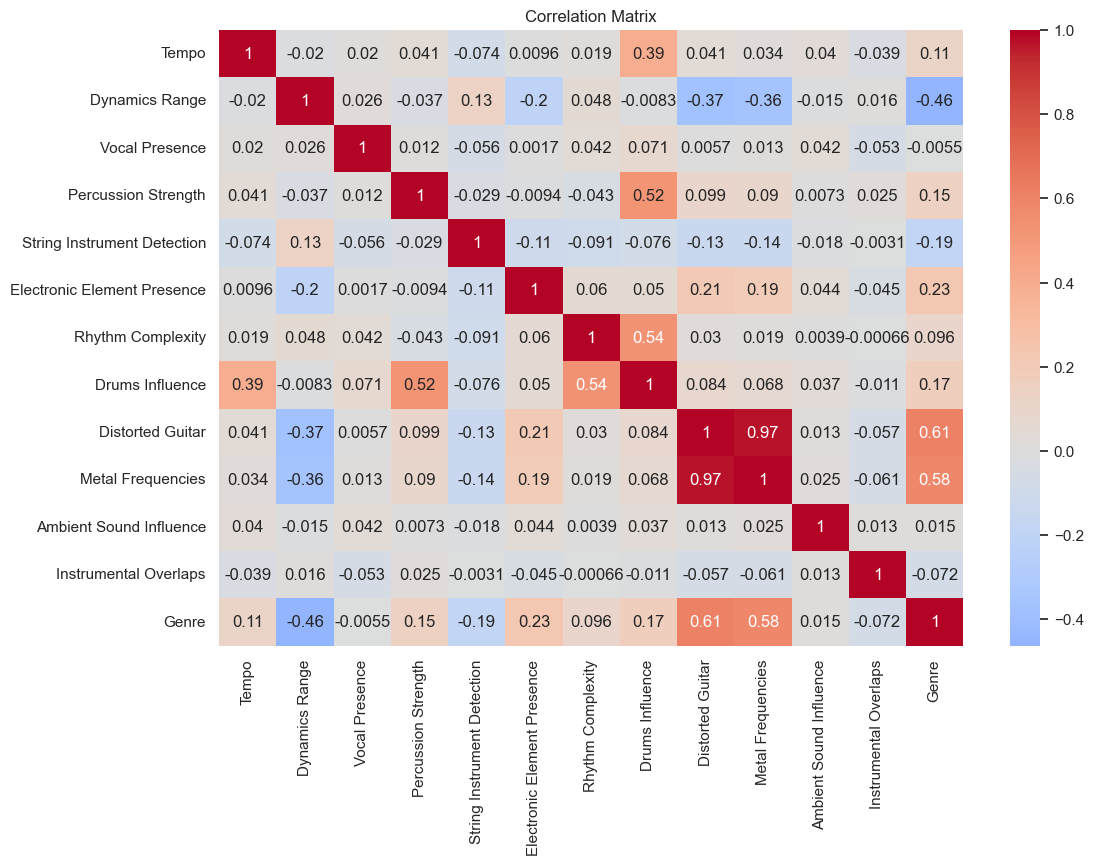

In [ ]:
# Utilize Seaborn's heatmap() function to create a heatmap of the correlation matrix.
# Adjust heatmap aesthetics (such as color intensity) to highlight strong correlations, which will help reveal feature relationships and potential influences on music genres.

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Standardize the Data

In [ ]:
# Use StandardScaler() from sklearn to standardize your feature data.
# Apply fit_transform() on the feature matrix to obtain a scaled version, which is essential for accurate PCA results.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled[:3]

array([[-0.32276419,  0.63236264,  0.05320844,  1.50523556, -1.45322339,
        -0.95083358, -0.28019766, -0.04531774,  0.98696183,  0.76493507,
         1.53633887,  0.16037718],
       [-0.21834523,  1.26791613,  1.52189513,  1.22385336, -0.36496745,
        -1.95260506,  1.02680658,  1.27329993, -1.44193372, -1.4654764 ,
        -1.15313543, -1.16143819],
       [ 0.37404526,  0.35132812,  0.48306804,  1.68907011, -1.74376335,
         0.03864233, -1.23967786,  0.05128826,  1.02629963,  1.26039216,
         1.49165303, -0.81044425]])

# PCA

In [ ]:
# Create an instance of PCA() without setting n_components to allow the model to analyze all components and their explained variance.

pca = PCA()

In [ ]:
# Transform Data Using PCA:
# Apply fit_transform() on the scaled data using the PCA instance and store the transformed data for further analysis.

X_pca = pca.fit_transform(X_scaled)

In [29]:
X_pca[:3]

array([[ 1.0572597 ,  0.28161626,  0.62342202, -0.73574456,  1.29328805,
         1.05439349, -0.24994853, -0.27158679, -1.99869602,  0.74994362,
        -0.41133069,  0.20089952],
       [-1.86454175,  2.72389526, -0.06110915, -0.92326798, -1.77971712,
         1.34651169, -1.06142384,  0.17034065, -0.93988713, -0.46808373,
        -0.06524083,  0.03262838],
       [ 1.86197335,  0.0390771 ,  0.30639382, -1.91214553,  1.21700137,
         0.29362059, -0.66875032,  0.49138804, -1.62664643,  1.12924615,
        -0.20497339, -0.13108671]])

# Analyze Explained Variance

In [ ]:
# Access the explained_variance_ratio_ attribute to view each principal component's explained variance ratio.
# This ratio indicates how much variance each component accounts for in the data.

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

# Visualize Cumulative Variance

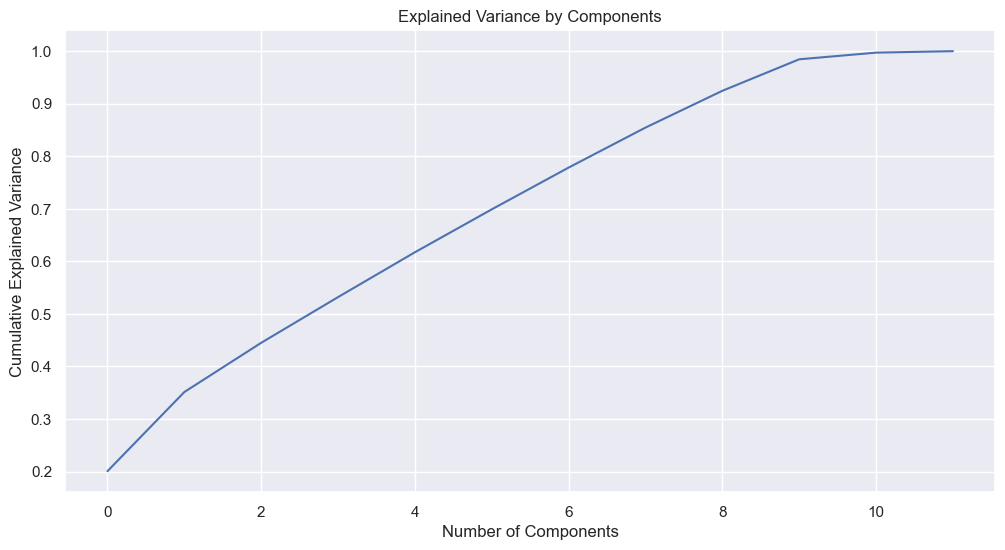

In [ ]:
# Use matplotlib to plot the cumulative sum of the explained variance ratio against the number of components.
# This plot will help you identify the number of components needed to reach at least 80% cumulative variance.

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(explained_variance))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# Decide on Number of Components:

In [ ]:
# Based on the cumulative variance plot, determine the minimum number of components required to explain at least 80% of the total variance.
# based on the visualization, we can see that 80% of the variance is explained by 6 components.
# Therefore, set n_components=6 in the PCA instance to retain these components.
n_components=6

# Reapply PCA with Optimal Components:
# Once the optimal number of components is identified, reapply PCA, this time setting n_components to the chosen number to retain only the necessary dimensions for reduced data.

pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

X_pca_final[:3]


array([[ 1.0572597 ,  0.28161626,  0.62342202, -0.73574456,  1.29328805,
         1.05439349],
       [-1.86454175,  2.72389526, -0.06110915, -0.92326798, -1.77971712,
         1.34651169],
       [ 1.86197335,  0.0390771 ,  0.30639382, -1.91214553,  1.21700137,
         0.29362059]])

# Split Data for PCA-Transformed Features

In [ ]:
# Use train_test_split() to split your PCA-transformed features (X_pca) and the encoded target variable (y_encoded) into training and test sets.
# Set test_size=0.3 and random_state=42 to ensure reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y_encoded, test_size=0.3, random_state=42)

# Train the Classifier on PCA Data

In [ ]:
# Initialize a LogisticRegression model with max_iter=10000 to allow sufficient iterations for convergence.
# Fit this model on the training data from the PCA-transformed dataset.

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Model Prediction and Evaluation on PCA Data

In [ ]:

# Use the trained Logistic Regression model to predict target values for the test set.
# Evaluate the model’s accuracy with accuracy_score() and generate a detailed classification report using classification_report().

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


# Original Data (Without PCA Transformation)

In [ ]:
# Split the original scaled features (X_scaled) and the encoded target (y_encoded) into training and test sets, again using test_size=0.3 and random_state=42.
# Train a second Logistic Regression model on this original (non-PCA-transformed) data, setting max_iter=10000 as well.

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

model_orig = LogisticRegression(max_iter=10000)
model_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

# Evaluate and Compare Performances

In [ ]:
# Predict and evaluate the second model on the test set, calculating its accuracy and generating a classification report.

y_pred_orig = model_orig.predict(X_test_orig)

accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f'Accuracy (Original Data): {accuracy_orig:.2f}')

Accuracy (Original Data): 0.53


In [40]:
# Compare the accuracy scores and classification reports of both models (PCA-transformed and original) to assess how PCA affects model performance.

print('\nClassification Report (PCA Data):\n', classification_report(y_test, y_pred))


Classification Report (PCA Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.38      0.35      0.36        52
           2       0.42      0.31      0.36        48
           3       0.40      0.39      0.39        62
           4       0.49      0.61      0.54        54

    accuracy                           0.52       267
   macro avg       0.51      0.52      0.51       267
weighted avg       0.51      0.52      0.51       267



In [41]:
print('\nClassification Report (Original Data):\n', classification_report(y_test_orig, y_pred_orig))


Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# Isolate Unknown Genre Data

In [42]:
# Identify rows in your original DataFrame where the Genre column has missing values.
# Extract these rows into a separate DataFrame to handle them specifically for genre prediction.

df_unknown = df_music[df_music['Genre'].isnull()].copy()

# Prepare Data for Prediction

In [43]:
# Remove the Genre column from this subset, as it’s the target variable.
# Apply the same data transformations used during model training:
# Standardize the data using StandardScaler.
# If using the PCA-based model, apply the trained PCA transformation to align this subset with the model’s input format.

X_unknown = df_unknown.drop(columns='Genre')
X_unknown_scaled = scaler.transform(X_unknown)

X_unknown_pca = pca_final.transform(X_unknown_scaled)



# Apply the Model for Prediction

In [44]:
# Use the classifier model (either PCA-transformed or original feature-based) selected from the previous task to predict the genres for these tracks.

y_unknown_pred = model.predict(X_unknown_pca)


# Transform Predictions to Original Labels

In [ ]:
# Use LabelEncoder.inverse_transform() on the numeric predictions to convert them back to their original genre labels for easier interpretation and integration.

y_unknown_pred_labels = label_encoder.inverse_transform(y_unknown_pred)

# Update the Original DataFrame

In [46]:
# Assign the predicted genre labels to the corresponding rows in the original DataFrame, filling in the missing genre information.

df_music.loc[df_unknown.index, 'Genre'] = y_unknown_pred_labels

In [47]:
# Review the Updated Data:

# Examine the DataFrame to verify that the missing genre data has been filled accurately with the model’s predictions.

df_music.loc[df_unknown.index]

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,Jazz
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,Jazz
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Classical
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Country
